<style>
    <style>
body {
    font-family: Arial, sans-serif;
    line-height: 1.6;
}
h1 {
    color: #c0392b; 
}
h3 {
    color: #0e6ab8; 
    color: #c0392b;
}
li {
    color: #d4bf91; 
}
p {
    color: #0e6ab8; 
}
.highlight {
    color: #c0392b;
    font-weight: bold;
}
ul {
    color: #555;
}
li strong {
    /* color: #0e6ab8;  */
    color: #c0392b;
}
</style>
</head>
<body>
    <div class="container">
        <h1>Data Science Job Salaries Dataset</h1>
        <p>The dataset contains 11 columns, each described below:</p>
        <ul>
            <li><strong>work_year:</strong> The year the salary was paid.</li>
            <li><strong>experience_level:</strong> The experience level in the job during the year with the following possible values:
                <ul>
                    <li>EN - Entry-level / Junior</li>
                    <li>MI - Mid-level / Intermediate</li>
                    <li>SE - Senior-level / Expert</li>
                    <li>EX - Executive-level / Director</li>
                </ul>
            </li>
            <li><strong>employment_type:</strong> The type of employment for the role:
                <ul>
                    <li>PT - Part-time</li>
                    <li>FT - Full-time</li>
                    <li>CT - Contract</li>
                    <li>FL - Freelance</li>
                </ul>
            </li>
            <li><strong>job_title:</strong> The role worked in during the year.</li>
            <li><strong>salary:</strong> The total gross salary amount paid.</li>
            <li><strong>salary_currency:</strong> The currency of the salary paid as an ISO 4217 currency code.</li>
            <li><strong>salary_in_usd:</strong> The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).</li>
            <li><strong>employee_residence:</strong> Employee's primary country of residence during the work year as an ISO 3166 country code.</li>
            <li><strong>remote_ratio:</strong> The overall amount of work done remotely, possible values:
                <ul>
                    <li>0 - No remote work (less than 20%)</li>
                    <li>50 - Partially remote</li>
                    <li>100 - Fully remote (more than 80%)</li>
                </ul>
            </li>
            <li><strong>company_location:</strong> The country of the employer's main office or contracting branch as an ISO 3166 country code.</li>
            <li><strong>company_size:</strong> The average number of people that worked for the company during the year:
                <ul>
                    <li>S - Less than 50 employees (small)</li>
                    <li>M - 50 to 250 employees (medium)</li>
                    <li>L - More than 250 employees (large)</li>
                </ul>
            </li>
        </ul>
    </div>
</body>
</html>


In [68]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
df = pd.read_csv('ds_salaries.csv')
df.drop(df[['salary','salary_currency','Unnamed: 0']],axis=1, inplace=True)
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


In [70]:
print(df.shape)
df.tail(3)

(607, 9)


,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
604,2022,SE,FT,Data Analyst,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,US,100,US,M
606,2022,MI,FT,AI Scientist,200000,IN,100,US,L


In [71]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary_in_usd       607 non-null    int64 
 5   employee_residence  607 non-null    object
 6   remote_ratio        607 non-null    int64 
 7   company_location    607 non-null    object
 8   company_size        607 non-null    object
dtypes: int64(3), object(6)
memory usage: 42.8+ KB


,work_year,salary_in_usd,remote_ratio
count,607.000000,607.000000,607.00000
mean,2021.405272,112297.869852,70.92257
std,0.692133,70957.259411,40.70913
min,2020.000000,2859.000000,0.00000
25%,2021.000000,62726.000000,50.00000
50%,2022.000000,101570.000000,100.00000
75%,2022.000000,150000.000000,100.00000
max,2022.000000,600000.000000,100.00000


<h2 style=" color:#c0392b;">Check Missing Values</h2>

In [72]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

<h2 style=" color:#c0392b;">Check duplicated Values</h2>

In [73]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
602    False
603    False
604    False
605    False
606    False
Length: 607, dtype: bool

<style>
    <style>
body {
    font-family: Arial, sans-serif;
    line-height: 1.6;
}
h1 {
    color: #c0392b; 
}
h3 {
    color: #0e6ab8; 
    color: #c0392b;
}
li {
    color: #d4bf91; 
}
p {
    color: #0e6ab8; 
}
.highlight {
    color: #c0392b;
    font-weight: bold;
}
ul {
    color: #555;
}
li strong {
    /* color: #0e6ab8;  */
    color: #c0392b;
}
</style>
<body>
    <div class="container">
        <h1>Categorical Columns</h1>
        <p>There are 6 categorical columns in the dataset:</p>
        <ul>
            <li>Experience Level</li>
            <li>Job Titles</li>
            <li>Employment Type</li>
            <li>Employee Residence</li>
            <li>Company Location</li>
            <li>Company Size</li>
        </ul>
    </div>
</body>

<style>
    <style>
body {
    font-family: Arial, sans-serif;
    line-height: 1.6;
}
h1 {
    color: #c0392b; 
}
h2 {
    color: #c0392b; 
}
h3 {
    color: #0e6ab8; 
    color: #c0392b;
}
li {
    color: #d4bf91; 
}
p {
    color: #0e6ab8; 
}
.highlight {
    color: #c0392b;
    font-weight: bold;
}
ul {
    color: #555;
}
li strong {
    /* color: #0e6ab8;  */
    color: #c0392b;
}
</style>
  </ul>
        <h2>Experience Level Categories</h2>
        <p>There are 4 categorical values in the 'Experience Level' column:</p>
        <ul>
            <li>EN - Entry-level</li>
            <li>MI - Mid-level</li>
            <li>SE - Senior-level</li>
            <li>EX - Executive-level</li>
        </ul>

In [74]:
df['experience_level'] = df['experience_level'].replace('EN','Entry-level')
df['experience_level'] = df['experience_level'].replace('MI','Mid-level')
df['experience_level'] = df['experience_level'].replace('SE','Senior-level')
df['experience_level'] = df['experience_level'].replace('EX','Executive-level')

<style>
    <style>
body {
    font-family: Arial, sans-serif;
    line-height: 1.6;
}
h1 {
    color: #c0392b; 
}
h2 {
    color: #c0392b; 
}
h3 {
    color: #0e6ab8; 
    color: #c0392b;
}
li {
    color: #d4bf91; 
}
p {
    color: #0e6ab8; 
}
.highlight {
    color: #c0392b;
    font-weight: bold;
}
ul {
    color: #555;
}
li strong {
    /* color: #0e6ab8;  */
    color: #c0392b;
}
</style>
<h2>Employment Type Categories</h2>
        <p>There are 4 categorical values in the 'Employment Type' column:</p>
        <ul>
            <li>PT - Part-time</li>
            <li>FT - Full-time</li>
            <li>CT - Contract</li>
            <li>FL - Freelance</li>
        </ul>

In [75]:
df['employment_type'] = df['employment_type'].replace('PT','Part-time')
df['employment_type'] = df['employment_type'].replace('FT','Full-time')
df['employment_type'] = df['employment_type'].replace('CT','Contract')
df['employment_type'] = df['employment_type'].replace('FL','Freelance')

<style>
    <style>
body {
    font-family: Arial, sans-serif;
    line-height: 1.6;
}
h1 {
    color: #c0392b; 
}
h2 {
    color: #c0392b; 
}
h3 {
    color: #0e6ab8; 
    color: #c0392b;
}
li {
    color: #d4bf91; 
}
p {
    color: #0e6ab8; 
}
.highlight {
    color: #c0392b;
    font-weight: bold;
}
ul {
    color: #555;
}
li strong {
    /* color: #0e6ab8;  */
    color: #c0392b;
}
</style>
<h2>Company Size Categories</h2>
    <p>There are 3 categorical values in the 'Company Size' column:</p>
    <ul>
        <li>L - Large</li>
        <li>M - Medium</li>
        <li>S - Small</li>
    </ul>

In [76]:
df['company_size'] = df['company_size'].replace('L', "Large")
df['company_size'] = df['company_size'].replace('M', "Medium")
df['company_size'] = df['company_size'].replace('S', "Small")

<style>
    <style>
body {
    font-family: Arial, sans-serif;
    line-height: 1.6;
}
h1 {
    color: #c0392b; 
}
h2 {
    color: #c0392b; 
}
h3 {
    color: #0e6ab8; 
    color: #c0392b;
}
li {
    color: #d4bf91; 
}
p {
    color: #0e6ab8; 
}
.highlight {
    color: #c0392b;
    font-weight: bold;
}
ul {
    color: #555;
}
li strong {
    /* color: #0e6ab8;  */
    color: #c0392b;
}
</style>
<h2>Numeric Columns</h2>
<p>There are 3 numeric columns in the dataset:</p>
<ul>
    <li>work_year - The year the salary was paid</li>
    <li>salary_in_usd - The salary in USD</li>
    <li>remote_ratio - The overall amount of work done remotely</li>
</ul>

In [77]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-level,Full-time,Data Scientist,79833,DE,0,DE,Large
1,2020,Senior-level,Full-time,Machine Learning Scientist,260000,JP,0,JP,Small
2,2020,Senior-level,Full-time,Big Data Engineer,109024,GB,50,GB,Medium
3,2020,Mid-level,Full-time,Product Data Analyst,20000,HN,0,HN,Small
4,2020,Senior-level,Full-time,Machine Learning Engineer,150000,US,50,US,Large


<h2 style=" color:#c0392b;">- visualize Work Year</h2>

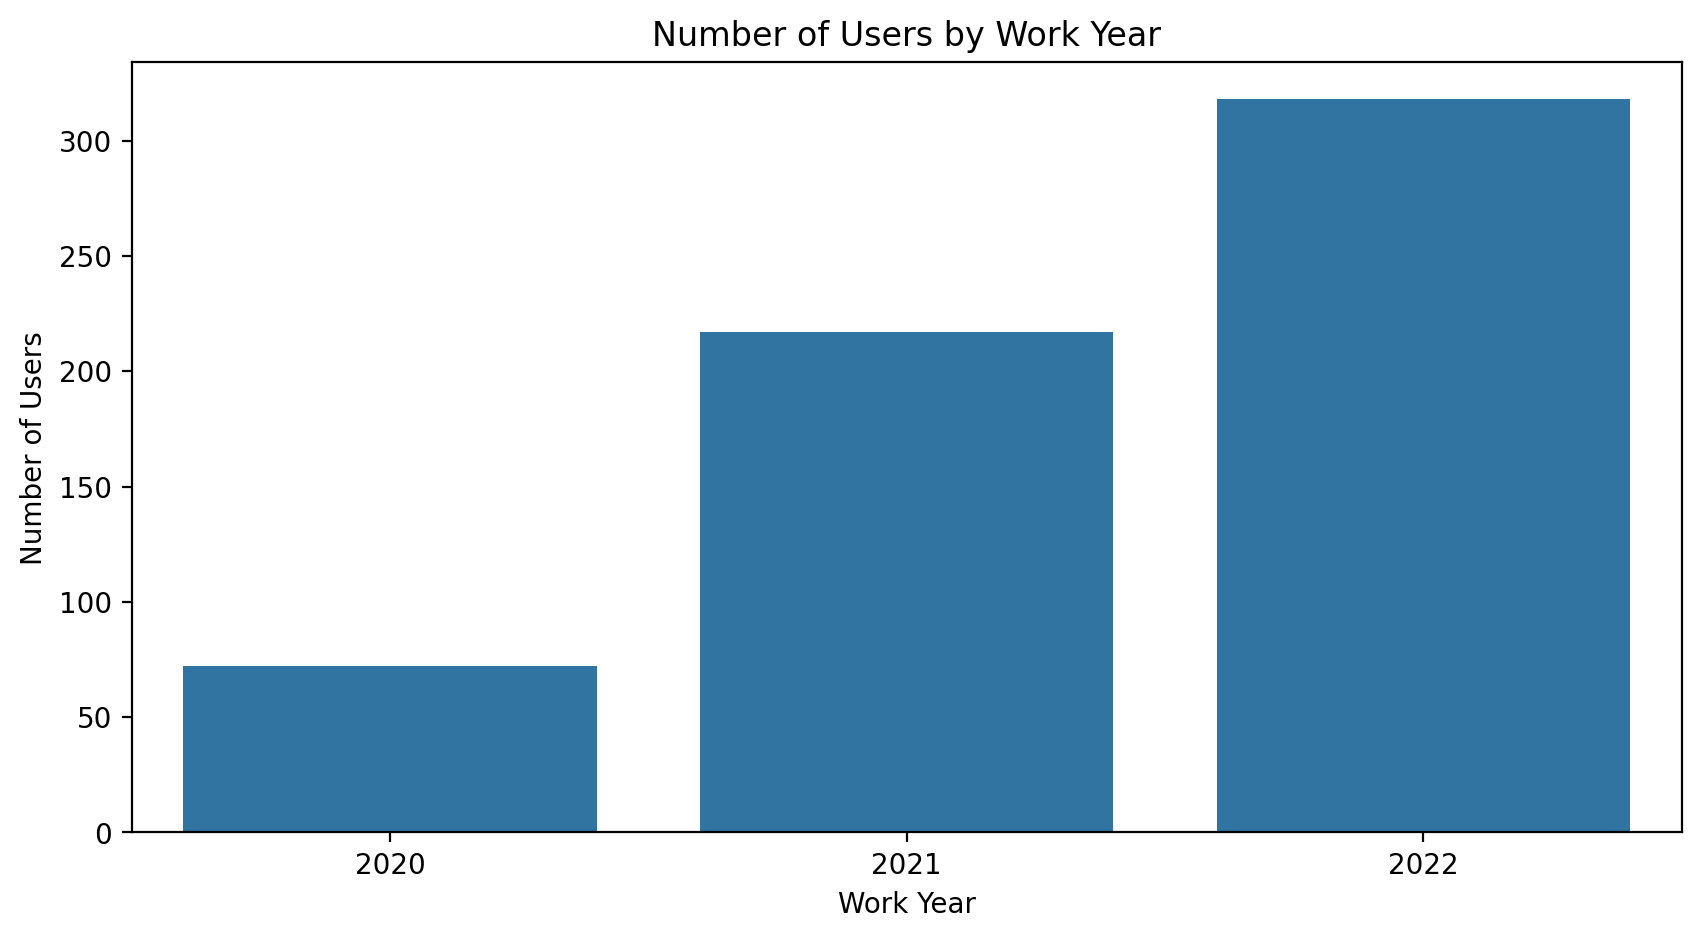

In [78]:
plt.figure(figsize = (10,5), dpi = 200)

plot = sns.countplot(data=df, x='work_year')

plt.xlabel('Work Year')
plt.ylabel('Number of Users')
plt.title("Number of Users by Work Year")

plt.show()

<h2 style=" color:#c0392b;">- Number of Users by Experience Level</h2>

<Figure size 2000x1000 with 0 Axes>

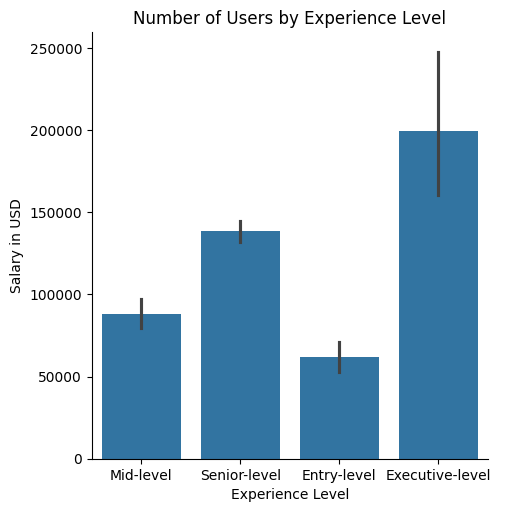

In [79]:
plt.figure(figsize = (10,5), dpi = 200)

plot = sns.catplot(data=df, x="experience_level",y="salary_in_usd", kind="bar")

plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.title("Number of Users by Experience Level")

plt.show()

<h2 style=" color:#c0392b;">- Salary Trend Over Time by Company Size</h2>

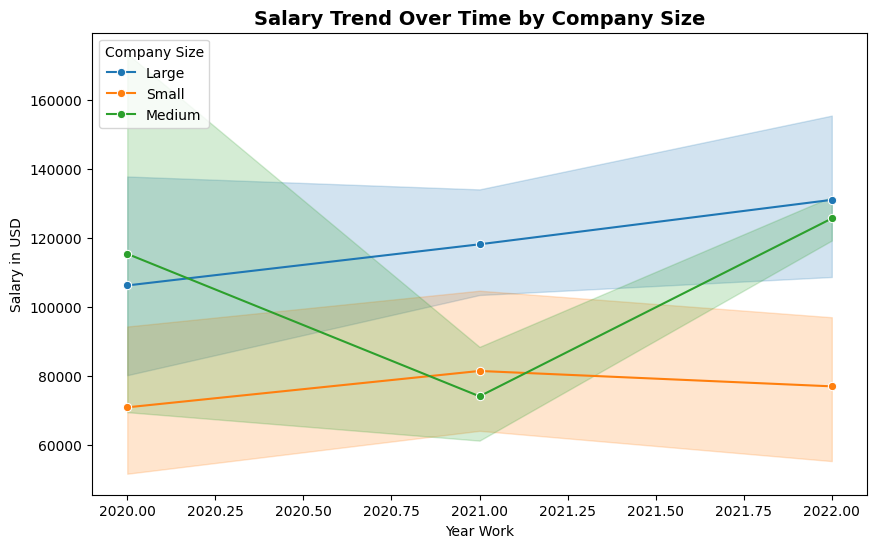

In [80]:
plt.figure(figsize=(10, 6))
plot = sns.lineplot(data=df, x='work_year', y='salary_in_usd', hue='company_size', marker='o')

plt.xlabel('Year Work')
plt.ylabel('Salary in USD')

plt.legend(title='Company Size', title_fontsize=10, fontsize=10, loc='upper left')

plt.title('Salary Trend Over Time by Company Size', fontsize=14, fontweight='bold')

plt.show()

<h2 style=" color:#c0392b;">Data Preprocessing - Label Encoding Categorical Columns</h2>

In [81]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# data 
print(df.head())
print(df.info())

# label encoding
encoder = LabelEncoder()
for col in ['experience_level', 'employment_type', 'job_title','employee_residence', 'company_location', 'company_size']:
    df[col] = encoder.fit_transform(df[col])

df.dropna(inplace=True)

   work_year experience_level employment_type                   job_title  \
0       2020        Mid-level       Full-time              Data Scientist   
1       2020     Senior-level       Full-time  Machine Learning Scientist   
2       2020     Senior-level       Full-time           Big Data Engineer   
3       2020        Mid-level       Full-time        Product Data Analyst   
4       2020     Senior-level       Full-time   Machine Learning Engineer   

   salary_in_usd employee_residence  remote_ratio company_location  \
0          79833                 DE             0               DE   
1         260000                 JP             0               JP   
2         109024                 GB            50               GB   
3          20000                 HN             0               HN   
4         150000                 US            50               US   

  company_size  
0        Large  
1        Small  
2       Medium  
3        Small  
4        Large  
<class 'pandas

<h2 style=" color:#c0392b;">Outlier Removal Using Interquartile Range (IQR)</h2>

In [82]:
# Calculate the Interquartile Range (IQR)
Q1 = df['salary_in_usd'].quantile(0.25)
Q3 = df['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['salary_in_usd'] >= lower_bound) & (df['salary_in_usd'] <= upper_bound)]


<h2 style=" color:#c0392b;">Salary Prediction Using Random Forest Regressor</h2>

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# define the features and target
X = df.drop(columns=['salary_in_usd'])
y = df['salary_in_usd']

# split the data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# predict the test set
y_pred = model.predict(X_test)

# evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")


R² Score: 0.5099
Mean Absolute Error: 27197.67
Mean Squared Error: 1305526508.76


<h2 style=" color:#c0392b;">Correlation Heatmap of Dataset Features</h2>

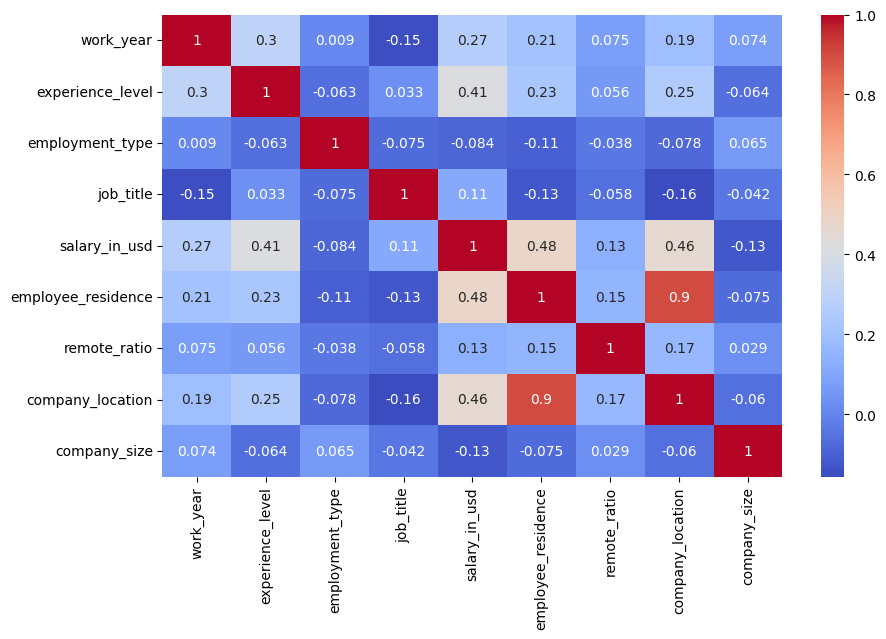

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

<h2 style=" color:#c0392b;">Dropping Unnecessary Columns from the Dataset</h2>

In [85]:
df = df.drop(columns=["employment_type", "remote_ratio"])
df.head()

,work_year,experience_level,job_title,salary_in_usd,employee_residence,company_location,company_size
0,2020,2,22,79833,14,12,0
1,2020,3,41,260000,32,29,2
2,2020,3,7,109024,20,18,1
3,2020,2,47,20000,23,20,2
4,2020,3,38,150000,55,48,0


<h2 style=" color:#c0392b;">Salary Prediction Using XGBoost Regressor</h2>

In [86]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

print(f"XGBoost R² Score: {r2_xgb:.4f}")
print(f"XGBoost Mean Absolute Error: {mae_xgb:.2f}")
print(f"XGBoost Mean Squared Error: {mse_xgb:.2f}")

XGBoost R² Score: 0.5532
XGBoost Mean Absolute Error: 26976.73
XGBoost Mean Squared Error: 1190029952.00


<h2 style=" color:#c0392b;">Hyperparameter Tuning for XGBoost Using RandomizedSearchCV</h2>

In [87]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from xgboost import XGBRegressor

# best parameters 
param_dist = {
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5)
}

# create the model
xgb = XGBRegressor(random_state=42)
random_search = RandomizedSearchCV(xgb, param_distributions=param_dist, n_iter=20, cv=3, n_jobs=-1, verbose=2)
random_search.fit(X_train, y_train)

# best parameters
print("Best Parameters:", random_search.best_params_)

# predict the test set
best_xgb = random_search.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test)
r2_best_xgb = r2_score(y_test, y_pred_best_xgb)
mse_best_xgb = mean_squared_error(y_test, y_pred_best_xgb)
mae_best_xgb = mean_absolute_error(y_test, y_pred_best_xgb)

# evaluate the model
print(f"Optimized XGBoost R² Score: {r2_best_xgb:.4f}")
print(f"Optimized XGBoost Mean Absolute Error: {mae_best_xgb:.2f}")
print(f"Optimized XGBoost Mean Squared Error: {mse_best_xgb:.2f}")


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'colsample_bytree': np.float64(0.5076451804571013), 'learning_rate': np.float64(0.03684169293570695), 'max_depth': 6, 'n_estimators': 194, 'subsample': np.float64(0.95482801482287)}
Optimized XGBoost R² Score: 0.5951
Optimized XGBoost Mean Absolute Error: 25916.25
Optimized XGBoost Mean Squared Error: 1078496640.00


<h2 style=" color:#c0392b;">Visualizing Distribution</h2>

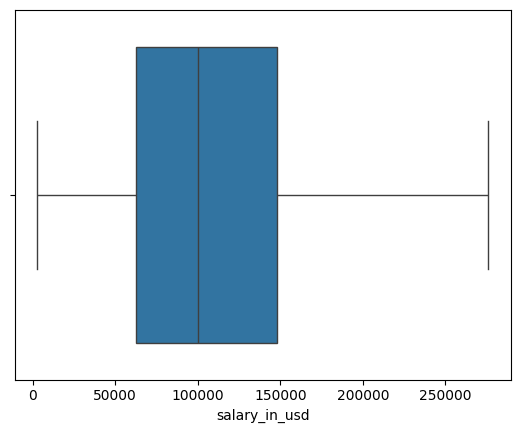

In [88]:
sns.boxplot(x=df["salary_in_usd"])
plt.show()

<h2 style=" color:#c0392b;">Saving the Trained XGBoost Model for Salary Prediction</h2>

In [89]:
import joblib
xgb.fit(X_train, y_train)
# Save the model
joblib.dump(xgb,"xgboost_salary_model.pkl")
print("Model saved successfully!")


Model saved successfully!
